# Exploration der Word2vec Embeddings 1

- Zeiträume: 50 Jahre
- ohne Bigramme
- vector_size: 300
- window: 3
- min_count: 2
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v7.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.34542030096054077,
 '1751-1800': 0.5178812742233276,
 '1801-1850': 0.629295825958252,
 '1851-1900': 0.4497171640396118,
 '1901-1950': 0.5732372403144836,
 '1951-2000': 0.4328221082687378,
 '2001-2021': 0.5277324914932251}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

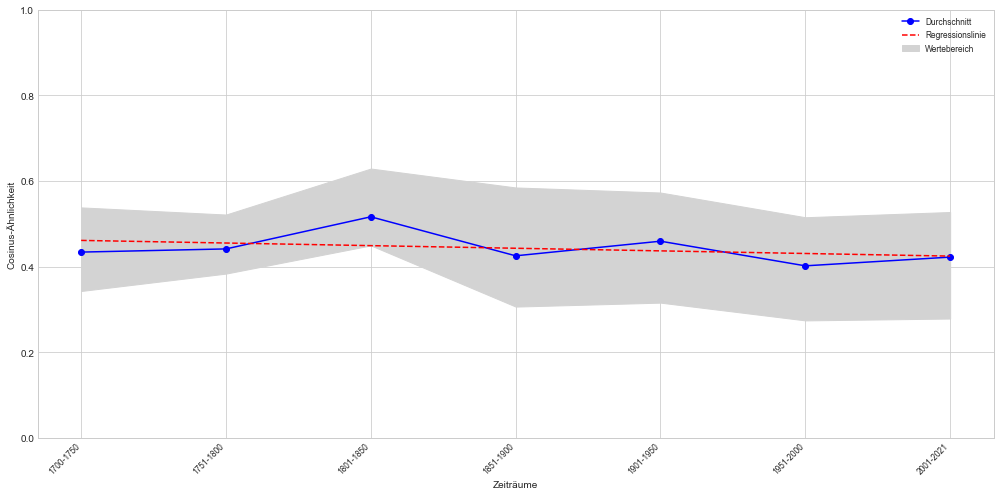

In [10]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [13]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [14]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [15]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [16]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [17]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [18]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [19]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [20]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

#essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])
essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere6, essere7, essere8, essere9, essere10, essere11])

# Durchschnitt pro Zeitraum
essere_mean = dict(essere_df.mean())

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [21]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

#avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])
avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere6, avere7, avere8, avere9, avere10, avere11])

# Durchschnitt pro Zeitraum
avere_mean = dict(avere_df.mean())

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [22]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, 
                                spesso_mean, essere_mean, avere_mean])
control_mean = dict(control_mean_df.mean())

In [23]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, 
                               spesso_min, essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [24]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, 
                               spesso_max, essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

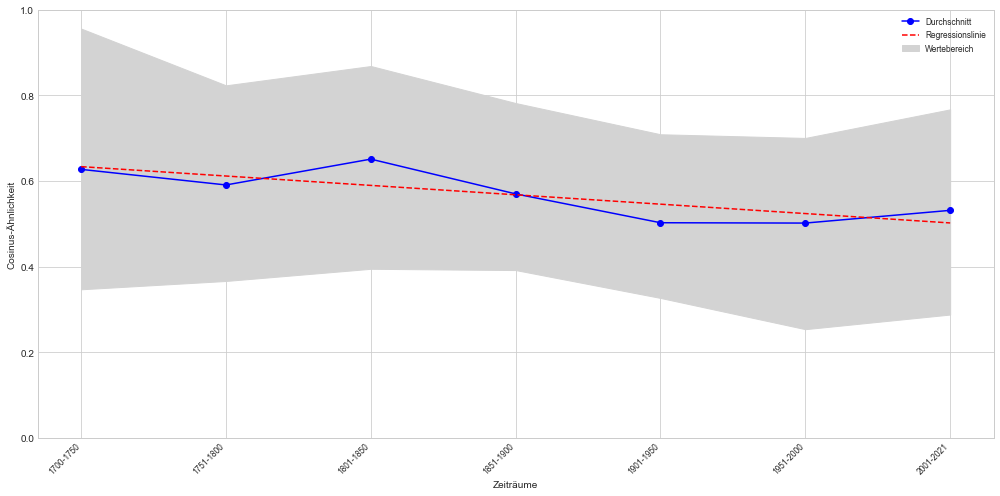

In [25]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [26]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(contradetto, 0.9893614053726196)","(mertar, 0.9911709427833557)","(pen, 0.9860978126525879)","(oppresso, 0.9511206746101379)","(deluso, 0.9308746457099915)","(atroce, 0.9568105340003967)","(torturare, 0.9158961772918701)"
1,"(conoscer, 0.988903284072876)","(dichiaratemi, 0.9890565872192383)","(duraron, 0.983954131603241)","(scambievole, 0.9508221745491028)","(consolare, 0.9257394671440125)","(infelice, 0.9499167203903198)","(orribilmente, 0.9087660312652588)"
2,"(riamarti, 0.9888424277305603)","(farmen, 0.988990306854248)","(arrossita, 0.9836048483848572)","(codardia, 0.949902355670929)","(ignaro, 0.9251037240028381)","(tremendo, 0.9493936896324158)","(mutilare, 0.9068970084190369)"
3,"(spron, 0.9885722398757935)","(sentiro, 0.9889415502548218)","(còrsi, 0.9835802316665649)","(tollerante, 0.9492285847663879)","(cagionare, 0.9203503727912903)","(folle, 0.9489662051200867)","(orrendamente, 0.8863892555236816)"
4,"(cinghiale, 0.988549530506134)","(fausti, 0.9889194965362549)","(press, 0.9830392599105835)","(cupidigia, 0.9480146765708923)","(scontare, 0.9195646047592163)","(risvegliare, 0.9447481632232666)","(cancro, 0.8766188621520996)"
5,"(poca, 0.9883562922477722)","(merit, 0.9887150526046753)","(stuolo, 0.9827340245246887)","(fiacco, 0.9468442797660828)","(torturare, 0.9184449911117554)","(orribile, 0.9433493614196777)","(preda, 0.8706285357475281)"
6,"(oltraggioso, 0.9883198142051697)","(prometter, 0.988592803478241)","(corregger, 0.9826419949531555)","(tenace, 0.9466803073883057)","(espiare, 0.9157624840736389)","(rimorso, 0.9432016611099243)","(dolore, 0.8658779859542847)"
7,"(tacerlo, 0.9880510568618774)","(vermiglie, 0.988427460193634)","(avvanzamento, 0.9823629856109619)","(indissolubile, 0.946382999420166)","(umiliazione, 0.9143878817558289)","(mortale, 0.9423989057540894)","(killer, 0.856776773929596)"
8,"(sdegnossi, 0.9880401492118835)","(maritale, 0.9881842732429504)","(verisimiglianza, 0.9821972846984863)","(stoico, 0.9461247324943542)","(malo, 0.913823664188385)","(orrendo, 0.9411170482635498)","(gravemente, 0.8531197905540466)"
9,"(dubbiando, 0.9879266023635864)","(vassi, 0.9881012439727783)","(burlarsi, 0.982081949710846)","(riazione, 0.9458518624305725)","(compreso, 0.9132975935935974)","(spaventoso, 0.9391294121742249)","(terrore, 0.8529854416847229)"


In [27]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.515618085861206,
 '1751-1800': 0.5248001217842102,
 '1801-1850': 0.556074857711792,
 '1851-1900': 0.5156950950622559,
 '1901-1950': 0.48838716745376587,
 '1951-2000': 0.4512844383716583,
 '2001-2021': 0.4240207076072693}

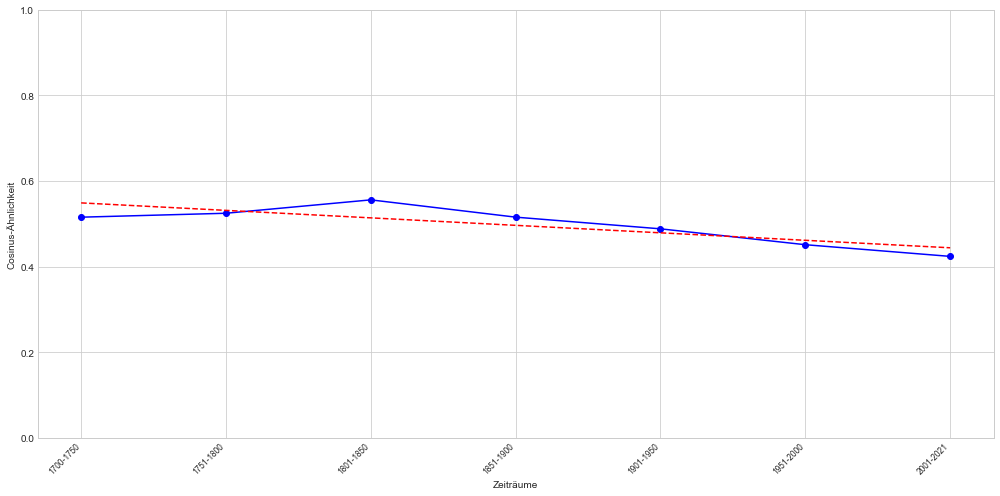

In [28]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

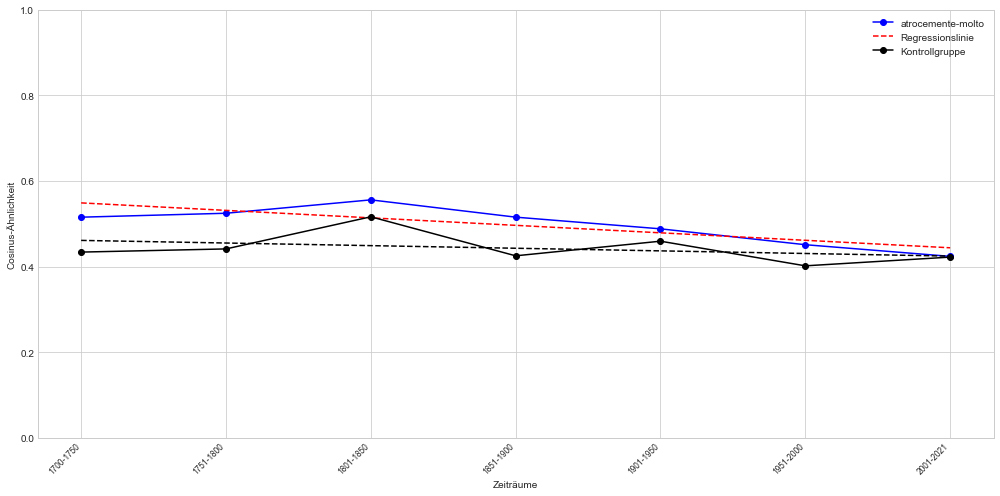

In [29]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [31]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
#atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [32]:
atrocemente1

{'1700-1750': 0.9372686147689819,
 '1751-1800': 0.8094979524612427,
 '1801-1850': 0.7325926423072815,
 '1851-1900': 0.6883052587509155,
 '1901-1950': 0.7019050121307373,
 '1951-2000': 0.8340574502944946,
 '2001-2021': 0.7819055914878845}

In [35]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

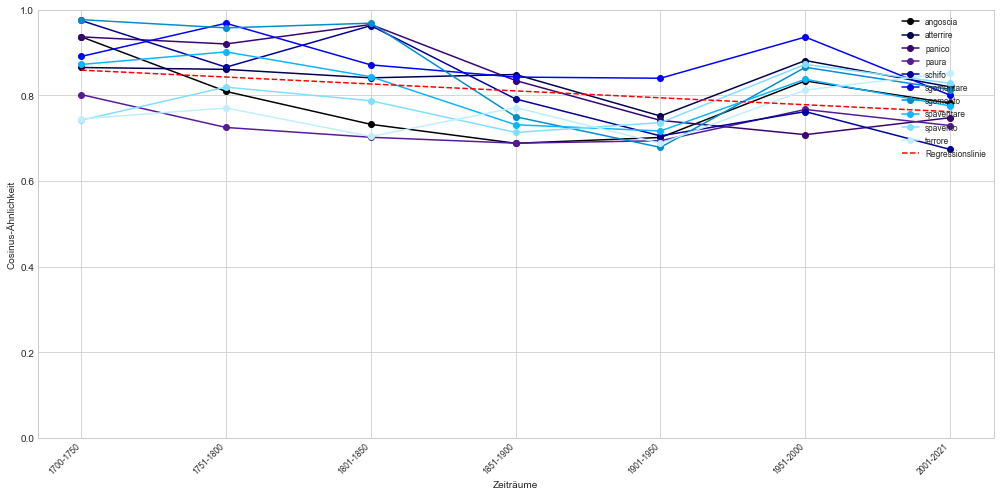

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

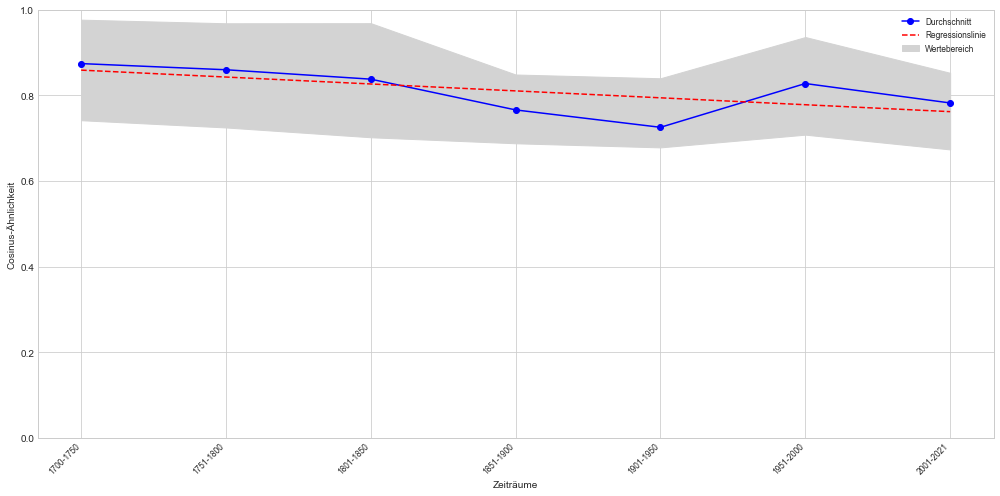

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

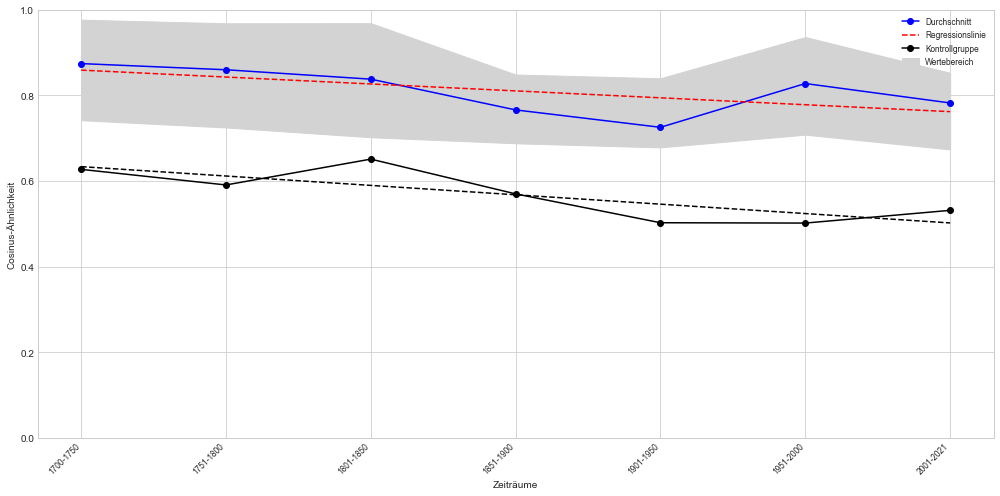

In [38]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [39]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(cleonense, 0.9895750880241394)",not in vocab,not in vocab,"(platonico, 0.984332799911499)","(lineamento, 0.9595348834991455)","(spaventosamente, 0.9415171146392822)","(scuro, 0.9114581346511841)"
1,"(tordo, 0.9891947507858276)",not in vocab,not in vocab,"(immanchevole, 0.9841634631156921)","(plastico, 0.9577176570892334)","(statura, 0.9091960787773132)","(terribilmente, 0.9017459154129028)"
2,"(barbarus, 0.9890620708465576)",not in vocab,not in vocab,"(originalità, 0.9840234518051147)","(impenetrabile, 0.9566864371299744)","(drammaticamente, 0.9025669693946838)","(tremendamente, 0.8987753391265869)"
3,"(cidonia, 0.9890570044517517)",not in vocab,not in vocab,"(cultore, 0.9839111566543579)","(rude, 0.9553815126419067)","(incredibilmente, 0.8999902009963989)","(viso, 0.8828896880149841)"
4,"(catholici, 0.9889062643051147)",not in vocab,not in vocab,"(aberrazione, 0.983791708946228)","(straordinariamente, 0.9518203735351562)","(esteso, 0.8972362875938416)","(elegante, 0.8816921710968018)"
5,"(alt, 0.9887704253196716)",not in vocab,not in vocab,"(esiziale, 0.9836166501045227)","(contemplazione, 0.9497936964035034)","(vitalità, 0.8954810500144958)","(spaventosamente, 0.8797338604927063)"
6,"(pomona, 0.9887498617172241)",not in vocab,not in vocab,"(tollerante, 0.9829553365707397)","(deformare, 0.9461023807525635)","(straordinariamente, 0.8949406147003174)","(celare, 0.8763844966888428)"
7,"(sententiae, 0.9887377023696899)",not in vocab,not in vocab,"(stravagante, 0.9828072786331177)","(spettro, 0.9455491900444031)","(affascinante, 0.8942319750785828)","(curioso, 0.8763667941093445)"
8,"(quidpiam, 0.9887084364891052)",not in vocab,not in vocab,"(fiacco, 0.982723593711853)","(radicare, 0.9450104236602783)","(enormemente, 0.8934590220451355)","(dolce, 0.876308023929596)"
9,"(erasino, 0.9886776804924011)",not in vocab,not in vocab,"(scambievole, 0.9826337099075317)","(irreale, 0.9441556930541992)","(abbondante, 0.8931583762168884)","(sottile, 0.8762046694755554)"


In [40]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.4710008502006531,
 '1851-1900': 0.5927796363830566,
 '1901-1950': 0.5828335881233215,
 '1951-2000': 0.6025745272636414,
 '2001-2021': 0.5886841416358948}

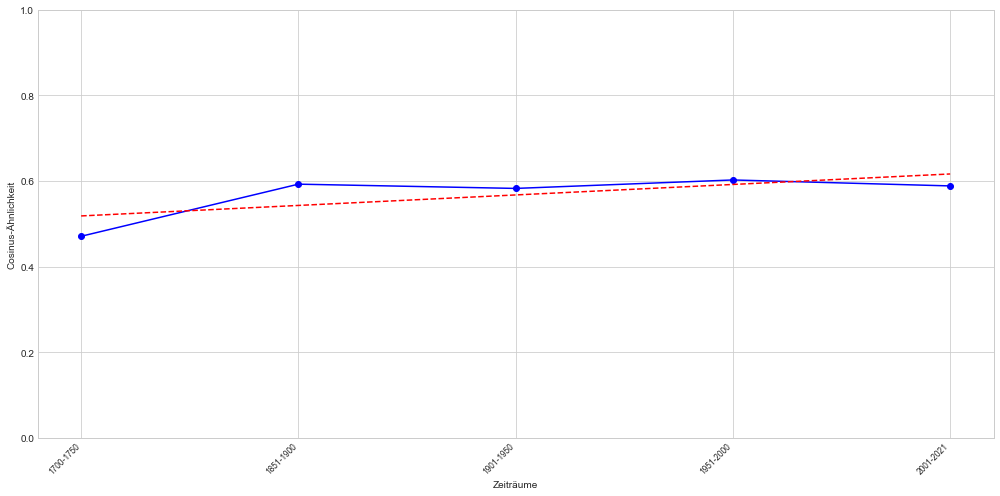

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [45]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
#mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [46]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

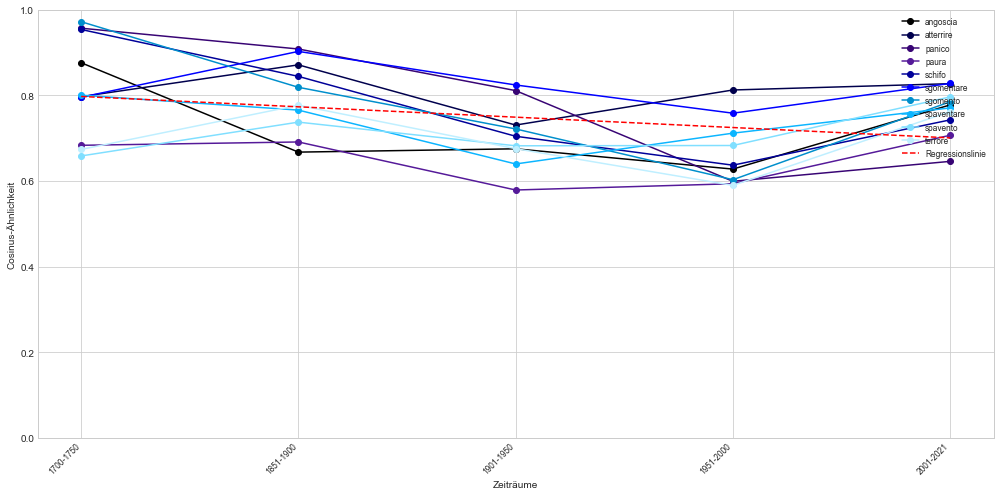

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

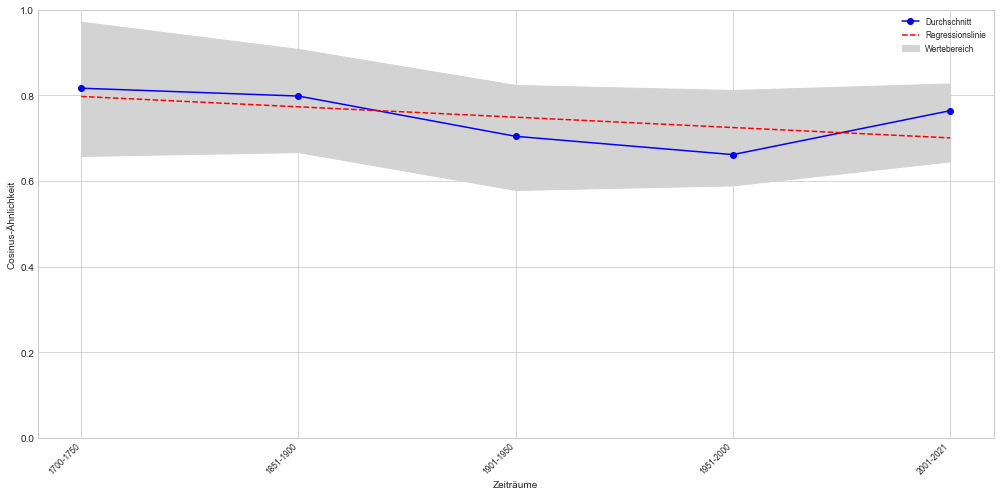

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [49]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,not in vocab,not in vocab,"(feltro, 0.9943433403968811)","(sembiante, 0.9734477996826172)","(narice, 0.9747104644775391)","(mutilare, 0.9474077224731445)","(orribilmente, 0.9528331756591797)"
1,not in vocab,not in vocab,"(fugge, 0.9941307306289673)","(risalutò, 0.9722662568092346)","(sugo, 0.9700449705123901)","(cane, 0.9117395877838135)","(mutilare, 0.9399711489677429)"
2,not in vocab,not in vocab,"(egeo, 0.9937636256217957)","(terremoto, 0.971705973148346)","(leccare, 0.9699435830116272)","(orribilmente, 0.9059759378433228)","(atrocemente, 0.8863893151283264)"
3,not in vocab,not in vocab,"(abitator, 0.9936690926551819)","(abbattuto, 0.9711543321609497)","(tunica, 0.9697601795196533)","(ferire, 0.9052345752716064)","(cristallo, 0.8662607073783875)"
4,not in vocab,not in vocab,"(porporino, 0.9936478734016418)","(flebile, 0.9709981679916382)","(bagnato, 0.9687680006027222)","(teste, 0.9047956466674805)","(torturare, 0.8625912666320801)"
5,not in vocab,not in vocab,"(alternatamente, 0.9936379194259644)","(ghiacciato, 0.9707813262939453)","(fragola, 0.9678477644920349)","(circondare, 0.9027613401412964)","(odore, 0.8583654165267944)"
6,not in vocab,not in vocab,"(svégliati, 0.9935356974601746)","(articolazione, 0.970592737197876)","(criniera, 0.9672144651412964)","(gravemente, 0.901324450969696)","(avvolgere, 0.857955813407898)"
7,not in vocab,not in vocab,"(rocchetto, 0.9935073256492615)","(tralucere, 0.9688652753829956)","(occhiello, 0.9671827554702759)","(dilaniare, 0.8907220959663391)","(viso, 0.8492169976234436)"
8,not in vocab,not in vocab,"(caliginoso, 0.9933897256851196)","(peperone, 0.9676618576049805)","(ricciuto, 0.966956615447998)","(sepolto, 0.8850889205932617)","(polvere, 0.8488150835037231)"
9,not in vocab,not in vocab,"(zanna, 0.9933192133903503)","(gutturale, 0.9675995111465454)","(paonazzo, 0.9667221903800964)","(atterriti, 0.8848942518234253)","(sfigurato, 0.8475739359855652)"


In [50]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1801-1850': 0.4831518530845642,
 '1851-1900': 0.41673895716667175,
 '1901-1950': 0.345293253660202,
 '1951-2000': 0.32036831974983215,
 '2001-2021': 0.3828525245189667}

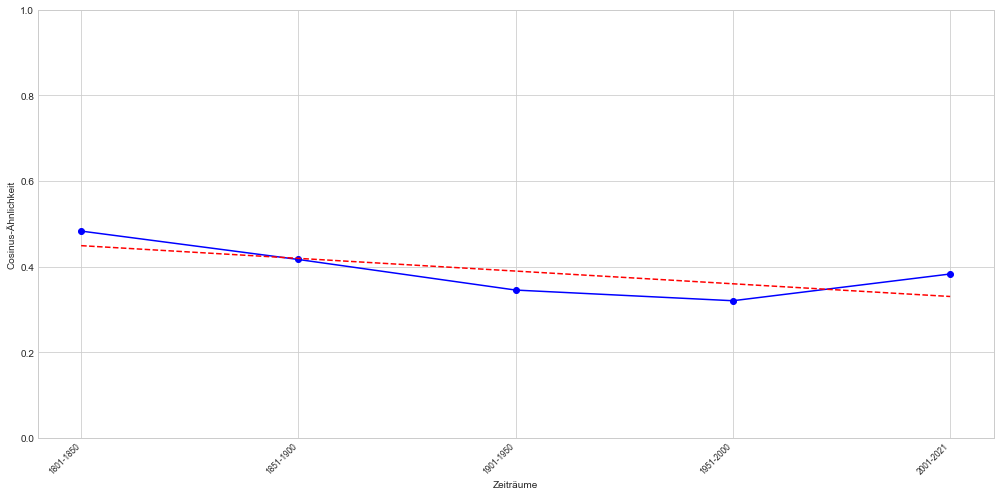

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [52]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
#orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [53]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

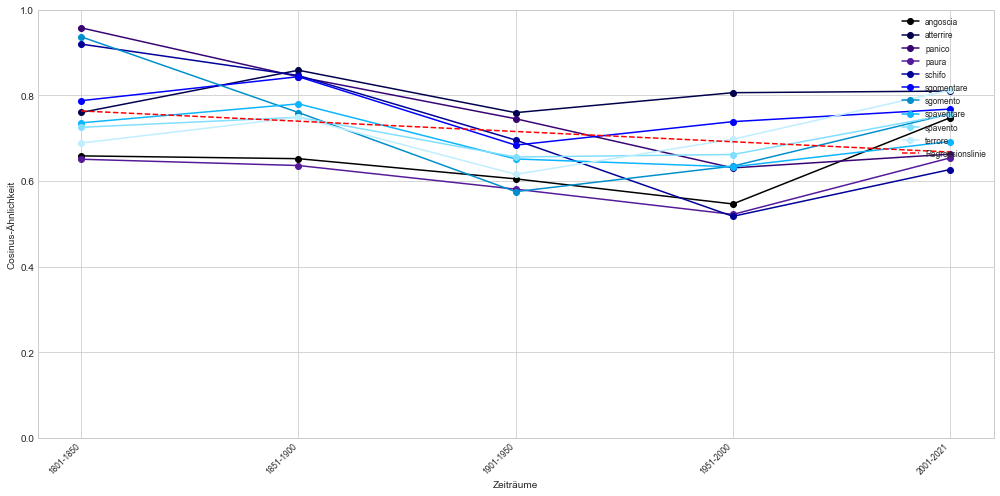

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

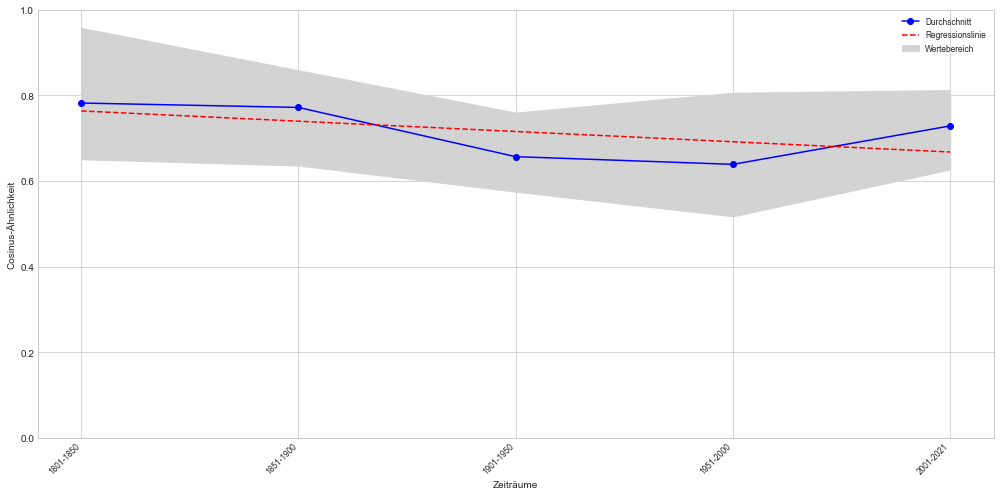

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [56]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(atri, 0.9834254384040833)","(clamide, 0.9786676168441772)","(vipera, 0.9789562821388245)","(livido, 0.9382802844047546)","(terribilmente, 0.9113682508468628)","(dilaniare, 0.9419359564781189)","(mutilare, 0.9596278667449951)"
1,"(insul, 0.982870876789093)","(obliquamente, 0.9770845770835876)","(baleno, 0.9783410429954529)","(pupilla, 0.9230323433876038)","(sofferente, 0.8759721517562866)","(mutilare, 0.9379255771636963)","(orrendamente, 0.9528331756591797)"
2,"(empié, 0.9826359748840332)","(fune, 0.9770501255989075)","(mormorio, 0.9780762195587158)","(gonfio, 0.9220948815345764)","(carne, 0.862703800201416)","(martirio, 0.9244704842567444)","(atrocemente, 0.9087660908699036)"
3,"(fischiare, 0.9818171262741089)","(rinfrescare, 0.9761013984680176)","(silenzioso, 0.9752665758132935)","(membra, 0.9209142923355103)","(maledetto, 0.8589186072349548)","(baffo, 0.9230680465698242)","(torturare, 0.8983106017112732)"
4,"(infiammato, 0.9817379713058472)","(cespuglio, 0.9758315086364746)","(perpendicolarmente, 0.974932074546814)","(tenue, 0.9187741875648499)","(testina, 0.8567821979522705)","(atterriti, 0.9222872257232666)","(preda, 0.8956468105316162)"
5,"(diradare, 0.9815283417701721)","(grandine, 0.9754533767700195)","(lanterna, 0.9740636348724365)","(rossore, 0.9164681434631348)","(straziare, 0.8541761040687561)","(ridonare, 0.9213772416114807)","(viso, 0.883720874786377)"
6,"(tamigi, 0.9813886284828186)","(tiranniche, 0.9753576517105103)","(legna, 0.9731912016868591)","(gelido, 0.9148713946342468)","(begli, 0.8508261442184448)","(ardere, 0.9185636639595032)","(sfigurato, 0.8801883459091187)"
7,"(grifagno, 0.981084406375885)","(sof, 0.9750853180885315)","(fodero, 0.9731305837631226)","(lineamento, 0.9138994812965393)","(tenero, 0.8499411940574646)","(ventre, 0.9181980490684509)","(urlo, 0.8798165917396545)"
8,"(dimesse, 0.9809755682945251)","(indorare, 0.9750183820724487)","(lucerna, 0.972972571849823)","(sudore, 0.9135714769363403)","(bimba, 0.8495820760726929)","(mimì, 0.9171541333198547)","(avvolgere, 0.879485011100769)"
9,"(polveroso, 0.9808595776557922)","(ferocemente, 0.9747273921966553)","(precipitoso, 0.9727575182914734)","(palpebra, 0.912373423576355)","(pallido, 0.849573016166687)","(pelo, 0.9157364964485168)","(atterrire, 0.8766597509384155)"


In [57]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.4500437080860138,
 '1751-1800': 0.46017420291900635,
 '1801-1850': 0.4813224673271179,
 '1851-1900': 0.3399912416934967,
 '1901-1950': 0.4865562915802002,
 '1951-2000': 0.37824633717536926,
 '2001-2021': 0.3953548073768616}

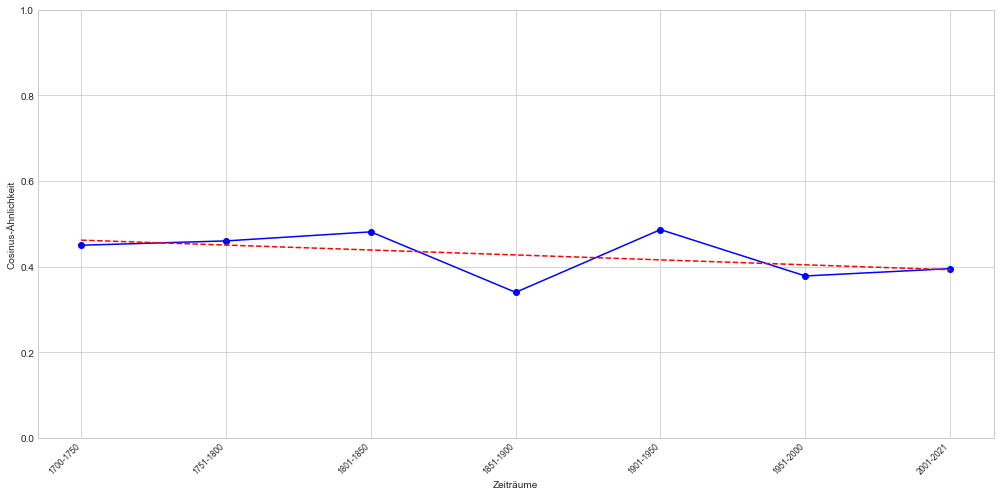

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [60]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
#orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [61]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

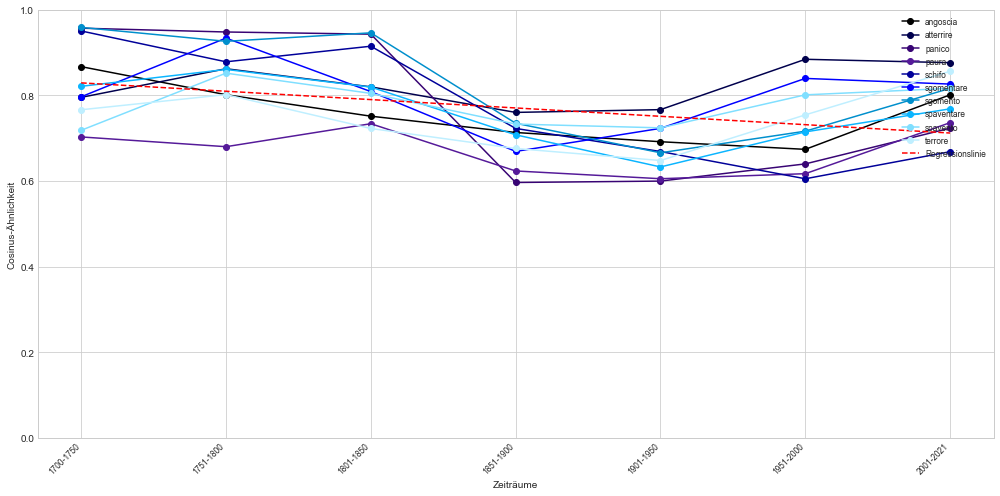

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

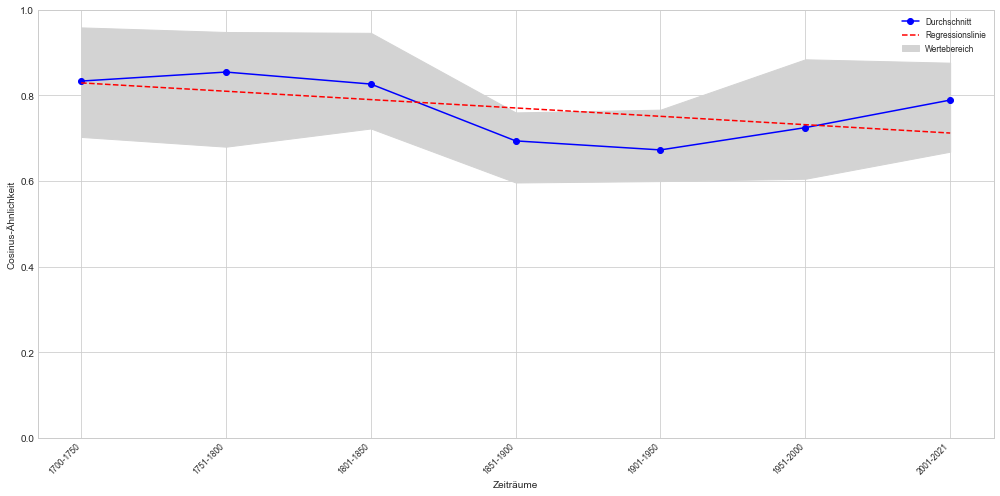

In [63]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [64]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(antibo, 0.9815473556518555)",not in vocab,"(abborriti, 0.9921664595603943)","(riverberare, 0.9747176170349121)","(violentemente, 0.9373301863670349)","(mostruosamente, 0.9415171146392822)","(abbastanza, 0.9078099131584167)"
1,"(scoppio, 0.9784013628959656)",not in vocab,"(necropoli, 0.9915609359741211)","(vacuo, 0.9738902449607849)","(scarno, 0.935547411441803)","(laborioso, 0.9208893179893494)","(leggero, 0.8961047530174255)"
2,"(fermossi, 0.977732241153717)",not in vocab,"(nostr, 0.9914167523384094)","(distesa, 0.9738052487373352)","(tremito, 0.9338950514793396)","(drammaticamente, 0.9203295707702637)","(terribilmente, 0.8903337121009827)"
3,"(panaro, 0.9770071506500244)",not in vocab,"(socratico, 0.9912565350532532)","(adamante, 0.9735583066940308)","(palpebra, 0.9326204061508179)","(eguale, 0.9160709977149963)","(concentrazione, 0.8860175609588623)"
4,"(pestilenza, 0.9765868186950684)",not in vocab,"(iscorgere, 0.9911915063858032)","(parevan, 0.9733706712722778)","(irrequieto, 0.9315584301948547)","(distante, 0.9144065380096436)","(magro, 0.8834418654441833)"
5,"(allagare, 0.9762951135635376)",not in vocab,"(transustanziare, 0.9911890625953674)","(imbalsamata, 0.973327100276947)","(velato, 0.930365264415741)","(esteso, 0.9137694835662842)","(tremendamente, 0.8832026720046997)"
6,"(dormi, 0.9762210845947266)",not in vocab,"(eletta, 0.9911665320396423)","(peperone, 0.9733029007911682)","(testina, 0.9296213388442993)","(abbondante, 0.9117763042449951)","(riflesso, 0.8809780478477478)"
7,"(ind, 0.976195752620697)",not in vocab,"(celate, 0.9911470413208008)","(serena, 0.9729140996932983)","(sfiorare, 0.9281101822853088)","(straordinariamente, 0.9098343253135681)","(mostruosamente, 0.8797339200973511)"
8,"(plenilunio, 0.9752181172370911)",not in vocab,"(inferiorità, 0.991138756275177)","(sferzare, 0.9727040529251099)","(guancia, 0.9279219508171082)","(attenuare, 0.908121645450592)","(fungo, 0.8773733377456665)"
9,"(diecisette, 0.9742267727851868)",not in vocab,"(concepir, 0.9911345839500427)","(tingendosi, 0.9726829528808594)","(gracile, 0.9269843101501465)","(stranamente, 0.9067591428756714)","(sottile, 0.8721797466278076)"


In [65]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.4838203191757202,
 '1801-1850': 0.5721766352653503,
 '1851-1900': 0.42871272563934326,
 '1901-1950': 0.46987244486808777,
 '1951-2000': 0.6151115894317627,
 '2001-2021': 0.6732983589172363}

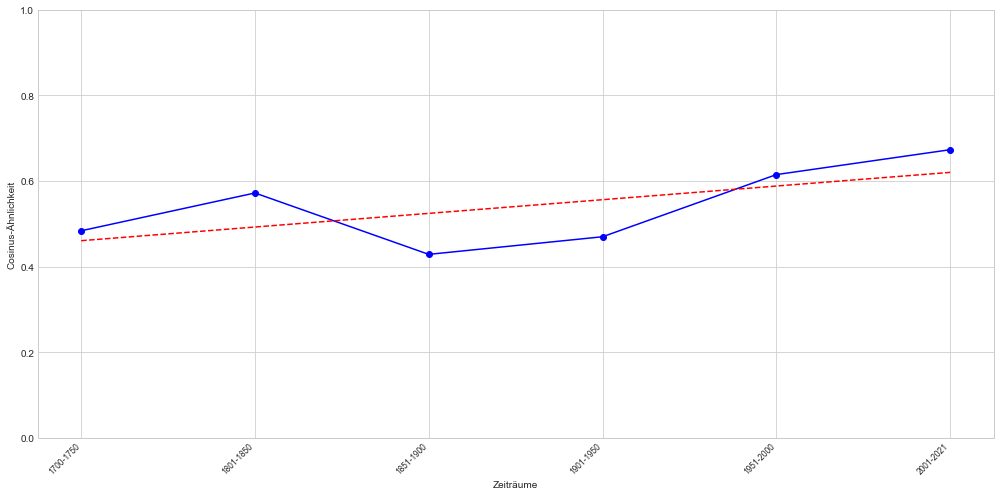

In [66]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [67]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
#spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [68]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

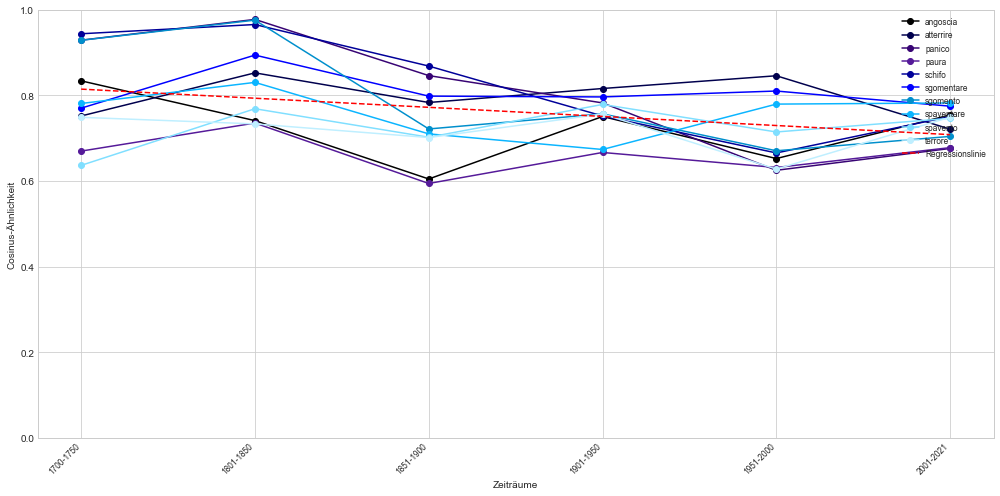

In [70]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

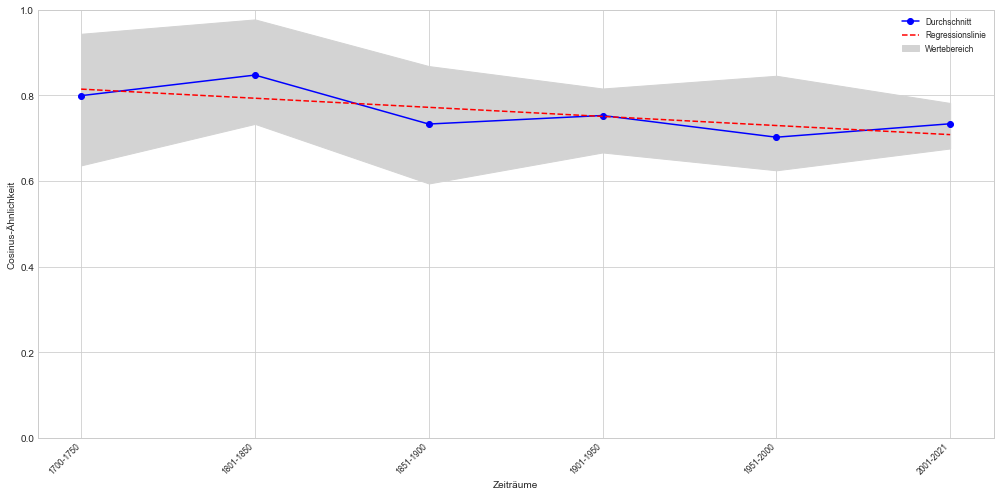

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [72]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(portin, 0.9860825538635254)","(accelerar, 0.9763419032096863)","(doglioso, 0.9825707077980042)","(affascinare, 0.9521856307983398)","(orribilmente, 0.9113683700561523)","(tremendamente, 0.9424371719360352)","(tremendamente, 0.9626122713088989)"
1,"(plaustro, 0.9860196113586426)","(morente, 0.9750020503997803)","(foga, 0.9816951751708984)","(distratto, 0.9508688449859619)","(alterare, 0.8750734329223633)","(banale, 0.9228968620300293)","(talmente, 0.9180232286453247)"
2,"(ostiglia, 0.9859887957572937)","(brevi, 0.9726032018661499)","(erogare, 0.9816650152206421)","(provocante, 0.9474658370018005)","(tenero, 0.8737190961837769)","(pi, 0.9164912700653076)","(angosciante, 0.9129491448402405)"
3,"(alpestri, 0.9858920574188232)","(ner, 0.9716355800628662)","(sofferire, 0.9801549911499023)","(beffardo, 0.9471541047096252)","(commuovere, 0.8635761737823486)","(abbastanza, 0.9163602590560913)","(oscuro, 0.9084089994430542)"
4,"(pinte, 0.9853139519691467)","(adduce, 0.970915675163269)","(vampa, 0.9797624945640564)","(arrossí, 0.9465049505233765)","(fiero, 0.8622164726257324)","(stranamente, 0.9135487675666809)","(sgomentare, 0.9050745964050293)"
5,"(rombo, 0.9852523803710938)","(avvenutosi, 0.9705040454864502)","(affilato, 0.9796614646911621)","(insinuante, 0.9454861283302307)","(sofferente, 0.8622034192085266)","(apparentemente, 0.9081098437309265)","(mostruosamente, 0.9017458558082581)"
6,"(austri, 0.985062301158905)","(vozieno, 0.9704142808914185)","(misera, 0.9792986512184143)","(turbato, 0.9451292753219604)","(gelosia, 0.8618959188461304)","(stupido, 0.9075040817260742)","(orrore, 0.8979905247688293)"
7,"(suonin, 0.9850581884384155)","(segnal, 0.9700707197189331)","(cavargli, 0.9790716767311096)","(alterato, 0.9428572654724121)","(timido, 0.8618085980415344)","(dovunque, 0.9059739112854004)","(tristezza, 0.8973185420036316)"
8,"(ordegni, 0.9849927425384521)","(morìa, 0.9699358344078064)","(indicibile, 0.9787656664848328)","(mormor, 0.9401277303695679)","(insopportabile, 0.8587327599525452)","(taluno, 0.9057050347328186)","(bestia, 0.8961561322212219)"
9,"(jussu, 0.9849364161491394)","(adone, 0.9695853590965271)","(pallidi, 0.9786911010742188)","(vibrare, 0.9388766288757324)","(mesto, 0.8577815890312195)","(simpatico, 0.9044044613838196)","(doloroso, 0.8957134485244751)"


In [73]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.46253249049186707,
 '1751-1800': 0.4608010947704315,
 '1801-1850': 0.5532733798027039,
 '1851-1900': 0.42894503474235535,
 '1901-1950': 0.5551536679267883,
 '1951-2000': 0.6284931898117065,
 '2001-2021': 0.614071786403656}

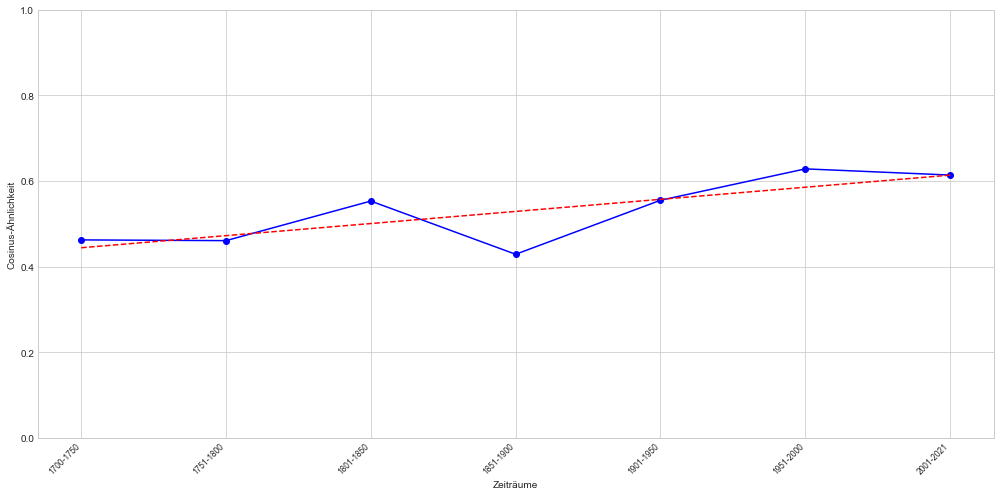

In [74]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')


plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

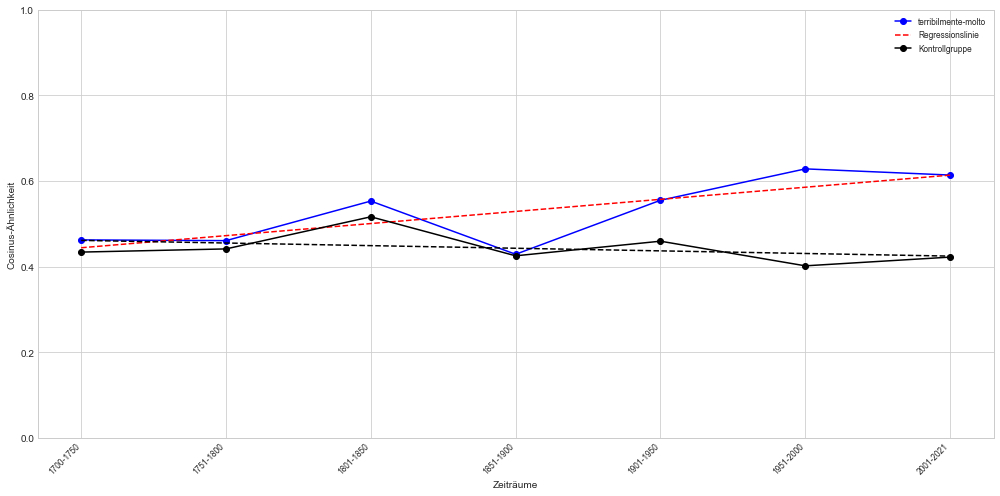

In [75]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [76]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
#terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [77]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

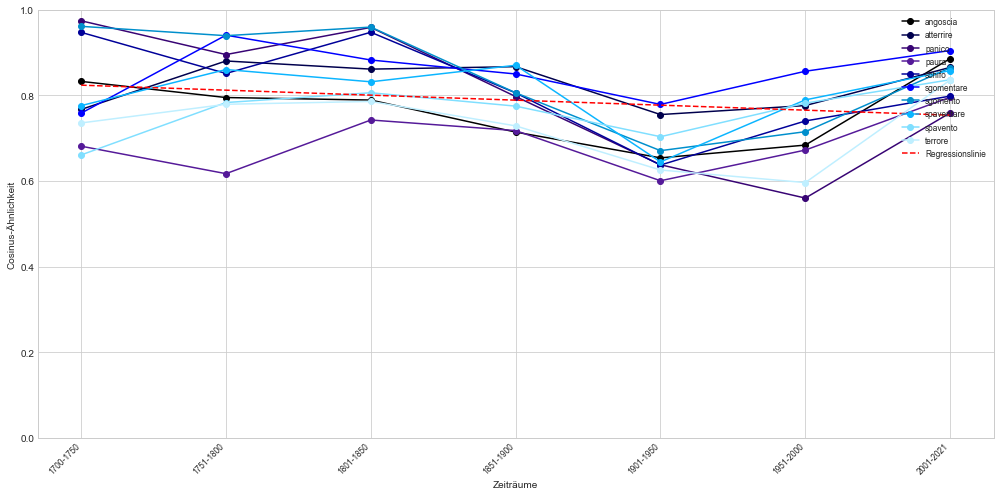

In [78]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

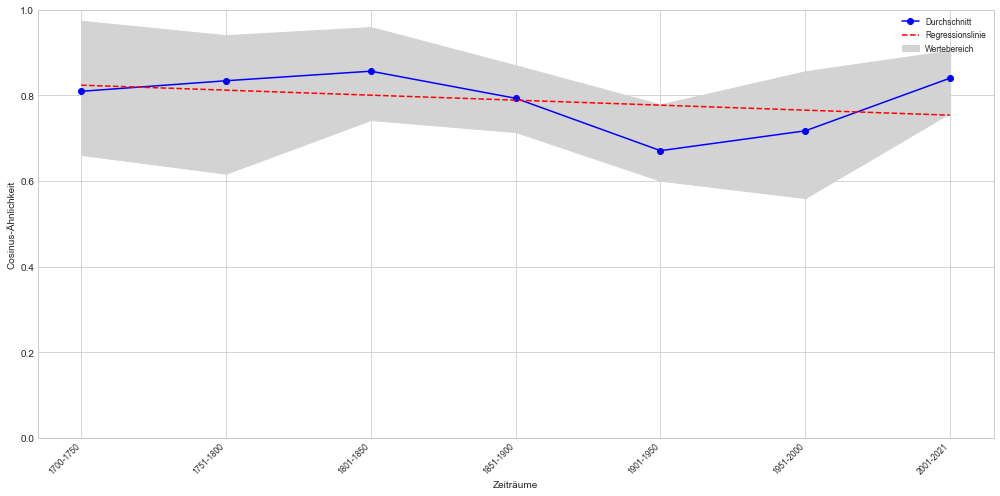

In [79]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [80]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,not in vocab,not in vocab,not in vocab,"(amai, 0.9612976312637329)","(fermezza, 0.9693232774734497)","(terribilmente, 0.9424371123313904)","(terribilmente, 0.9626122713088989)"
1,not in vocab,not in vocab,not in vocab,"(interessamento, 0.9605875015258789)","(avvilimento, 0.9647119045257568)","(noioso, 0.9415929317474365)","(talmente, 0.9048449993133545)"
2,not in vocab,not in vocab,not in vocab,"(lenire, 0.9590218663215637)","(inesplicabile, 0.9624561071395874)","(esagerato, 0.9376579523086548)","(mostruosamente, 0.8987753391265869)"
3,not in vocab,not in vocab,not in vocab,"(risparmiarti, 0.9582075476646423)","(ingiuria, 0.9572818279266357)","(apparentemente, 0.9370096921920776)","(oscuro, 0.8976925611495972)"
4,not in vocab,not in vocab,not in vocab,"(duol, 0.9575414061546326)","(scemare, 0.9567080736160278)","(benché, 0.9346321821212769)","(sensazione, 0.8972362875938416)"
5,not in vocab,not in vocab,not in vocab,"(secreta, 0.9573453664779663)","(avvilire, 0.9535678029060364)","(banale, 0.932652473449707)","(piuttosto, 0.8952829837799072)"
6,not in vocab,not in vocab,not in vocab,"(crudel, 0.9570006132125854)","(lusinga, 0.9535492062568665)","(stranamente, 0.9315435290336609)","(angosciante, 0.892585039138794)"
7,not in vocab,not in vocab,not in vocab,"(diabolico, 0.9555873870849609)","(soggezione, 0.9530773758888245)","(superficiale, 0.9311957359313965)","(bestia, 0.8920789957046509)"
8,not in vocab,not in vocab,not in vocab,"(empio, 0.9554491639137268)","(benevolo, 0.9528983235359192)","(fisicamente, 0.9308949112892151)","(seppure, 0.8881556987762451)"
9,not in vocab,not in vocab,not in vocab,"(brutalmente, 0.9552751779556274)","(momentaneo, 0.952620804309845)","(spietato, 0.9281315207481384)","(curioso, 0.8876319527626038)"


In [81]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1851-1900': 0.4624747633934021,
 '1901-1950': 0.5866750478744507,
 '1951-2000': 0.607374906539917,
 '2001-2021': 0.6678041815757751}

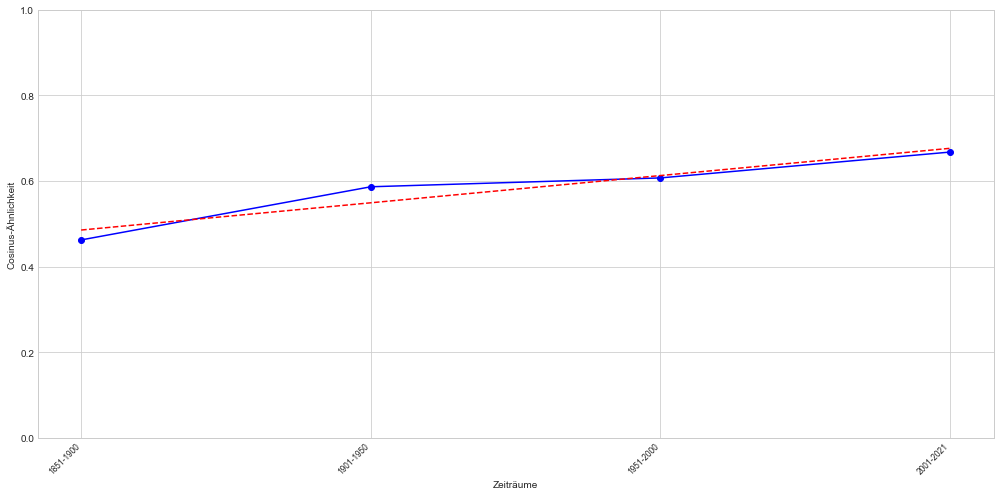

In [82]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [83]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
#tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [84]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

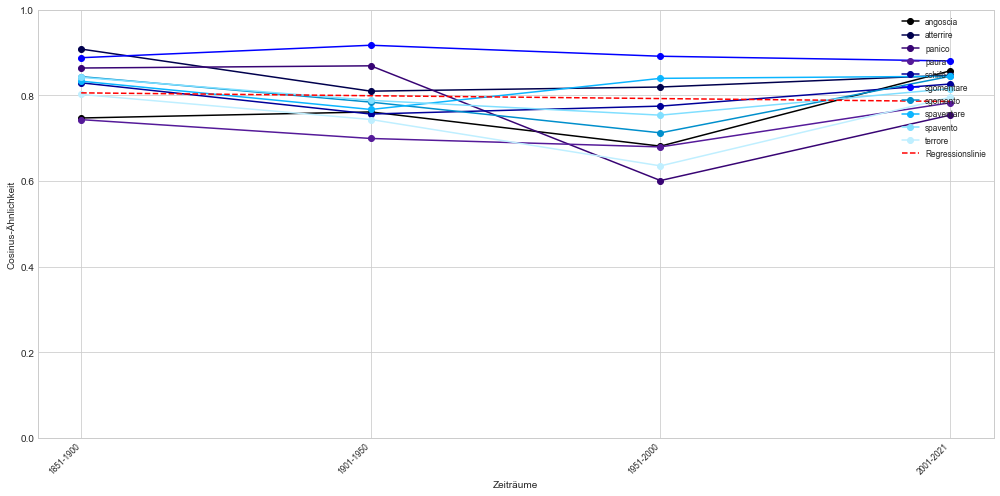

In [85]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

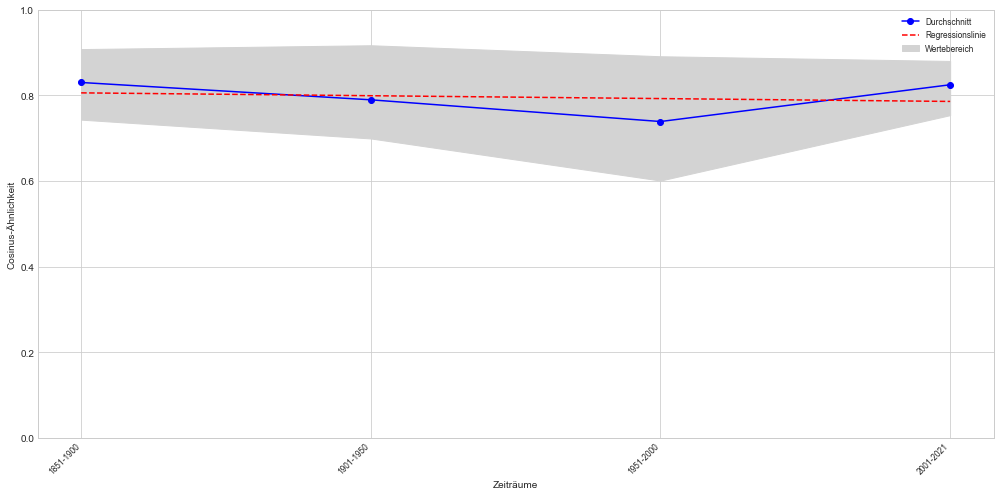

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()